In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [77]:
tickers =['AAPL', 'MSFT', 'AMZN', 'GOOG']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1')['Adj Close']

In [78]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1464 entries, 2015-01-02 to 2020-10-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1464 non-null   float64
 1   MSFT    1464 non-null   float64
 2   AMZN    1464 non-null   float64
 3   GOOG    1464 non-null   float64
dtypes: float64(4)
memory usage: 57.2 KB


In [79]:
mydata.head()

,AAPL,MSFT,AMZN,GOOG
Date,,,,
2015-01-02,24.941502,41.647892,308.519989,523.373108
2015-01-05,24.238857,41.264908,302.190002,512.463013
2015-01-06,24.241146,40.659245,295.290009,500.585632
2015-01-07,24.581060,41.175831,298.420013,499.727997
2015-01-08,25.525522,42.387146,300.459991,501.303680


In [80]:
mydata.tail()

,AAPL,MSFT,AMZN,GOOG
Date,,,,
2020-10-19,115.980003,214.220001,3207.209961,1534.609985
2020-10-20,117.510002,214.649994,3217.010010,1555.930054
2020-10-21,116.870003,214.800003,3184.939941,1593.310059
2020-10-22,115.750000,214.889999,3176.399902,1615.329956
2020-10-23,115.050003,215.309998,3170.500000,1634.880005


In [72]:
mydata.iloc[0]

AAPL         24.941502
MSFT         41.647892
AMZN        308.519989
GOOG        523.373108
MGLU3.SA     -0.011344
Name: 2015-01-02 00:00:00, dtype: float64

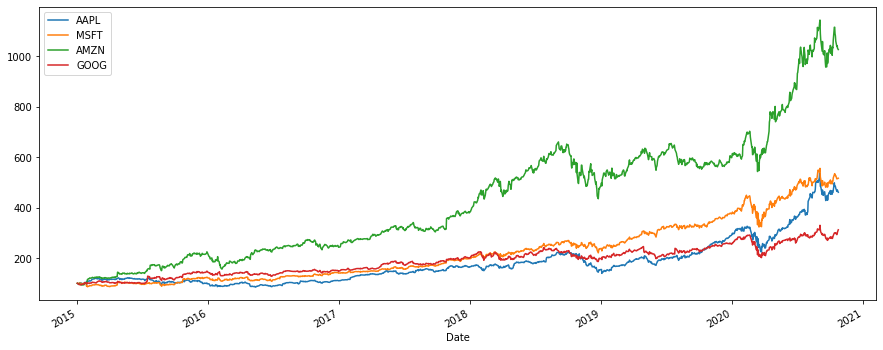

In [81]:
(mydata/mydata.iloc[0]*100).plot(figsize = (15,6));
plt.show()

In [82]:
mydata.loc['2015-01-02']

AAPL     24.941502
MSFT     41.647892
AMZN    308.519989
GOOG    523.373108
Name: 2015-01-02 00:00:00, dtype: float64

In [83]:
mydata.iloc[0]

AAPL     24.941502
MSFT     41.647892
AMZN    308.519989
GOOG    523.373108
Name: 2015-01-02 00:00:00, dtype: float64

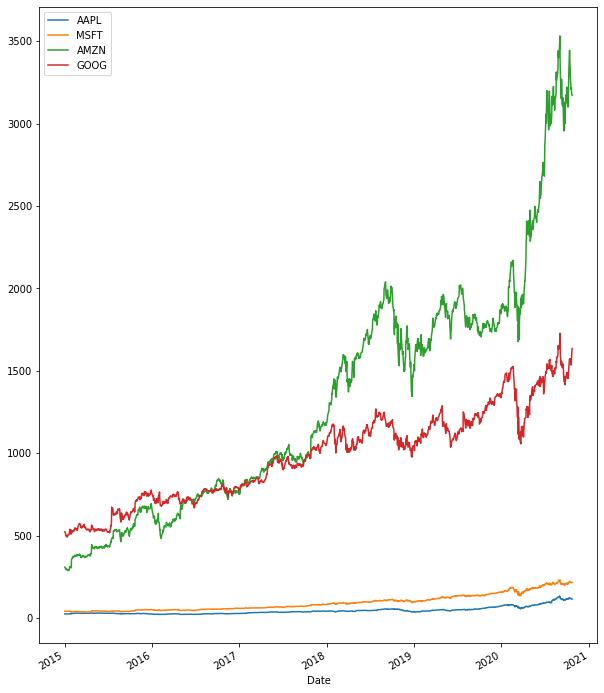

In [84]:
mydata.plot(figsize = (10,13))
plt.show()

returns = (mydata/mydata.shift(1))-1
returns.head()

In [86]:
returns = (mydata/mydata.shift(1))-1 
returns.head()

,AAPL,MSFT,AMZN,GOOG
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.009196,-0.020517,-0.020846
2015-01-06,0.000094,-0.014677,-0.022833,-0.023177
2015-01-07,0.014022,0.012705,0.010600,-0.001713
2015-01-08,0.038422,0.029418,0.006836,0.003153


In [88]:
weights = np.array([0.25,0.25,0.25,0.25])

In [89]:
np.dot(returns, weights)

array([        nan, -0.01968261, -0.01514834, ...,  0.00232696,
        0.00049362,  0.0015381 ])

In [90]:
annal_returns = returns.mean()*250
annal_returns

AAPL    0.304639
MSFT    0.319351
AMZN    0.445421
GOOG    0.230396
dtype: float64

In [91]:
np.dot(annal_returns, weights)

0.32495184822560796

In [92]:
pfolio_1 = str(round(np.dot(annal_returns, weights),5)*100) + ' %' 
print(pfolio_1)

32.495000000000005 %
